In [1]:
import matplotlib.pyplot as plt
import random
from itertools import combinations
import numpy as np

Prerequisite

In [2]:
li = list(zip(range(0, 51), range(0, 51)))
print(li[0])
print(li[-1])

(0, 0)
(50, 50)


In [3]:
# Unzip a Sequence
x, y = zip(*li)

print(x)
print(y)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)


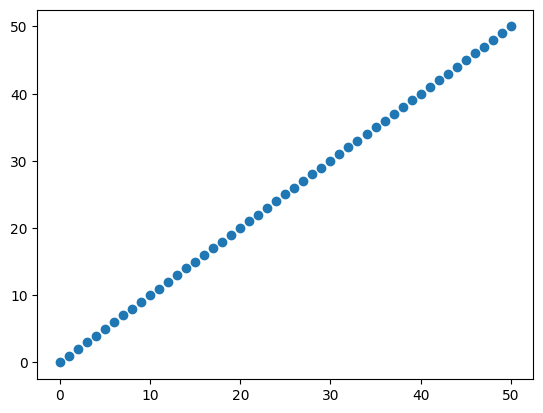

In [4]:
plt.scatter(x, y)
# or plt.scatter(*zip(*li))

In [5]:
letters ="GeEK"
 
# size of combination is set to 3
a = combinations(letters, 2)
print(a)

y = [' '.join(i) for i in a]
 
print(y)

['G e', 'G E', 'G K', 'e E', 'e K', 'E K']


Start from here

Randomly find 4 points within the range, the last point is the hub

In [6]:
max_range = 50
min_range = 2
num_dest = 3
points = []
for i in range(num_dest+1):
    points.append((random.randint(min_range,max_range+1), random.randint(min_range,max_range+1)))
print(points)

[(27, 22), (25, 50), (5, 45), (18, 25)]


In [7]:
x, y = zip(*points)
print(x)
print(y)

(27, 25, 5, 18)
(22, 50, 45, 25)


In [8]:
d = ['1', '2']
d.append('b')
d

['1', '2', 'b']

Plot it and differentiate the destinations from the hub

(0.0, 52.0)

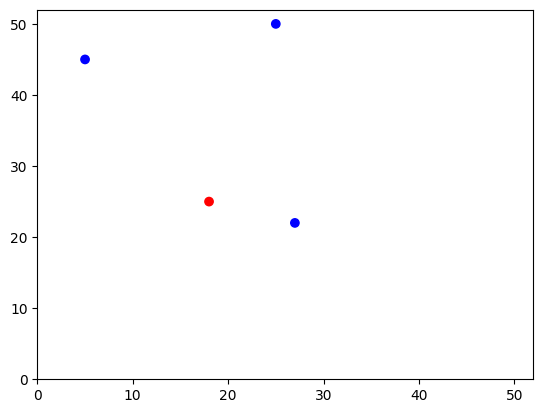

In [9]:
color = ['b' for i in range(num_dest)] # destinations
color.append('red') # hub

plt.scatter(x = x, y = y, c = color)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Draw all possible paths

(0.0, 52.0)

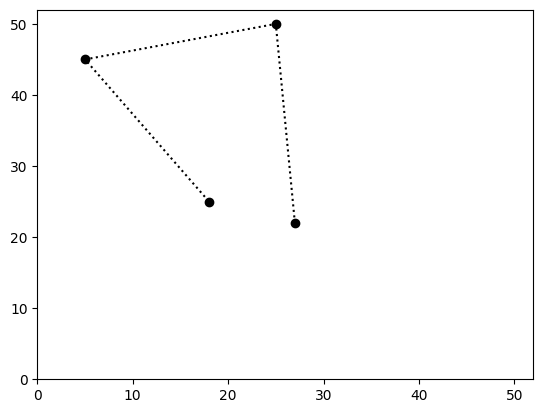

In [10]:
# [WRONG] 
plt.plot(list(x), list(y), linestyle=':',color='black',marker='o')
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

In [11]:
# [CORRECT] 
a = combinations(points, 2)
points_combination = [i for i in a]
points_combination

[((27, 22), (25, 50)),
 ((27, 22), (5, 45)),
 ((27, 22), (18, 25)),
 ((25, 50), (5, 45)),
 ((25, 50), (18, 25)),
 ((5, 45), (18, 25))]

(0.0, 52.0)

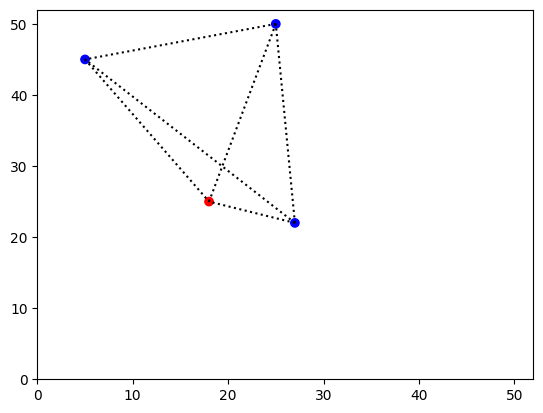

In [12]:
for point in points_combination:
    x_comb, y_comb = zip(*point)
    plt.plot(list(x_comb), list(y_comb), linestyle=':',color='black',marker=None)

# color points
plt.scatter(x = x, y = y, c = color, alpha=1.0)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])

Calculate the distances of all possible paths

In [13]:
x

(27, 25, 5, 18)

In [14]:
y

(22, 50, 45, 25)

In [15]:
points

[(27, 22), (25, 50), (5, 45), (18, 25)]

In [16]:
points_combination

[((27, 22), (25, 50)),
 ((27, 22), (5, 45)),
 ((27, 22), (18, 25)),
 ((25, 50), (5, 45)),
 ((25, 50), (18, 25)),
 ((5, 45), (18, 25))]

In [101]:
def cal_dist(start, dest):
    return round(np.linalg.norm(np.array(start) - np.array(dest)), 1)

In [102]:
points_comb_dist = []
for i in points_combination:
    point_a = i[0]
    point_b = i[1]
    dist = cal_dist(point_a, point_b)
    points_comb_dist.append(dist)
print(points_comb_dist)

[28.1, 31.8, 9.5, 20.6, 26.0, 23.9]


Plot the distance values next to the lines

(0.0, 52.0)

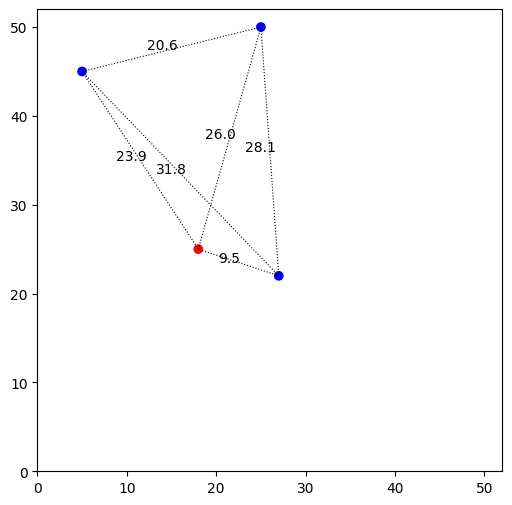

In [103]:
fig, ax = plt.subplots(figsize=(6,6))

for point in points_combination:
    x_comb, y_comb = zip(*point)
    plt.plot(list(x_comb), list(y_comb), linestyle=':',color='black',marker=None, linewidth=0.8)
    
    point_a = np.array(point[0])
    point_b = np.array(point[1])
    dist = cal_dist(point_a, point_b)
    
    loc_mid_line = (sum(x_comb)/2, sum(y_comb)/2)
    ax.text(loc_mid_line[0]-1, loc_mid_line[1], str(dist), ha = 'center')

plt.scatter(x = x, y = y, c = color, alpha=1.0)
plt.xlim([0, max_range+2])
plt.ylim([0, max_range+2])



For only 3 destinations with 1 vehicle, it is probably easy to spot the shortest route by manual examining. 

How to pragmatically find the shortest route, even though there are 50 destinations? (step 1) and more than 1 vehicle? (step 2)

In [23]:
points

[(27, 22), (25, 50), (5, 45), (18, 25)]

In [68]:
starting = points[-1]
destinations = points[:-1]
print(starting)
print(destinations)

(18, 25)
[(27, 22), (25, 50), (5, 45)]


In [88]:
def find_next_dest(origin, destinations):
    all_paths = [(idx, cal_dist(origin, v)) for idx, v in enumerate(destinations)]
    shortest_path_values = min(all_paths)
    shortest_path_idx = shortest_path_values[0]
    shortest_path = shortest_path_values[1]
    selected_dest = destinations[shortest_path_idx]
    return selected_dest, shortest_path

In [104]:
starting = points[-1]
destinations = points[:-1]

i = 3
total_dist = 0
route = [starting]
origin = starting

while len(destinations) > 0 or i < 0:
    selected_dest, shortest_path = find_next_dest(origin, destinations)
    total_dist += shortest_path
    # add to the final route list
    route.append(selected_dest)
    # remove this round's destination from the unused destination list
    destinations.remove(selected_dest)
    # this round's destination becomes next round's original point
    origin = selected_dest
    i -= 1

# lastly, the last destination needs to go back to the very starting point
route.append(starting)
total_dist += cal_dist(selected_dest, starting)

In [105]:
total_dist

82.1